In [ ]:
%pip install rdkit-pypi
%pip install deepchem
%pip install dgl==0.9
%pip install dgllife
%pip install torch
%pip install tensorflow

In [74]:
import deepchem as dc
import dgl
import torch
from deepchem.models import AttentiveFP
from deepchem.models import AttentiveFPModel
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole #Needed to show molecules
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions #Only needed if modifying defaults
from rdkit.Chem.Draw import SimilarityMaps
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

In [75]:
smiles = ["C1CCC1", "C1=CC=CN=C1"]
featurizer = dc.feat.MolGraphConvFeaturizer(use_edges=True)
graphs = featurizer.featurize(smiles)
print(type(graphs[0]))
dgl_graphs = [graphs[i].to_dgl_graph(self_loop=True) for i in range(len(graphs))]
batch_dgl_graph = dgl.batch(dgl_graphs)
model = AttentiveFP(n_tasks=1, mode='regression')
preds = model(batch_dgl_graph)
print(type(preds))

<class 'deepchem.feat.graph_data.GraphData'>
<class 'torch.Tensor'>


In [76]:
smiles = ["C1CCC1", "C1=CC=CN=C1", "CCC"]
labels = [0., 1., 0.]
featurizer = dc.feat.MolGraphConvFeaturizer(use_edges=True)
X = featurizer.featurize(smiles)
dataset = dc.data.NumpyDataset(X=X, y=labels)
model = AttentiveFPModel(mode='classification', n_tasks=1, batch_size=16, learning_rate=0.001)
loss = model.fit(dataset, nb_epoch=5)
loss

0.0940597414970398

In [84]:
# Read sdf file with structures
input_structures_file = Chem.SDMolSupplier('All_input_structures.sdf')
structures = []

# Append strutures to a list
for x in input_structures_file:
    y = Chem.Mol(x)
    AllChem.Compute2DCoords(y)
    structures.append(y)

print(len(structures))

1116


d:\Development\Pharma\MDRInhib\env\lib\site-packages\rdkit\Chem\Draw\IPythonConsole.py:258: UserWarning: Truncating the list of molecules to be displayed to 4. Change the maxMols value to display more.
  warnings.warn(


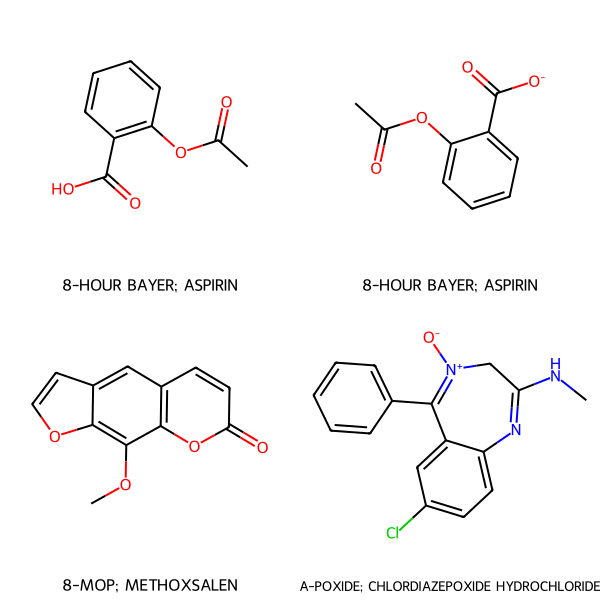

In [78]:
Draw.MolsToGridImage(
    structures,
    molsPerRow=2,
    maxMols=4,
    subImgSize=(300, 300), 
    legends=[x.GetProp("FDA drugnames") for x in structures]
    )

['s_m_entry_id', 's_m_entry_name', 'BindingDB monomerid', 'FDA drugnames', 's_m_Source_Path', 's_m_Source_File', 'i_m_Source_File_Index', 's_m_subgroup_title', 's_m_subgroupid', 'b_m_subgroup_collapsed']


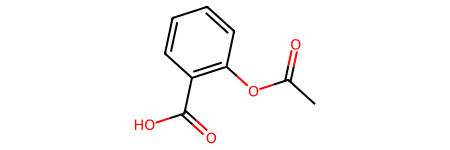

In [79]:
print(list(structures[0].GetPropNames()))
structures[0]

In [88]:
def unique(list_of_structures):
    
    unique_list_prop = []
    unique_list = []

    for x in list_of_structures:
        test = x.GetProp("FDA drugnames") + x.GetProp('s_i_glide_gridfile')
        if test not in unique_list_prop:
            unique_list_prop.append(test)
            unique_list.append(x)
    return unique_list

# Read sdf file
suppl = Chem.SDMolSupplier('All_input_structures.sdf')

mols = [x for x in suppl]
print("Total number of FDA drug conformations successfully docked: " + str(len(mols)))

mols2 = unique(mols)
print("Number of FDA drugs successfully docked: " + str(len(mols2)))

Total number of FDA drug conformations successfully docked: 1116


KeyError: 's_i_glide_gridfile'

d:\Development\Pharma\MDRInhib\env\lib\site-packages\rdkit\Chem\Draw\IPythonConsole.py:258: UserWarning: Truncating the list of molecules to be displayed to 4. Change the maxMols value to display more.
  warnings.warn(


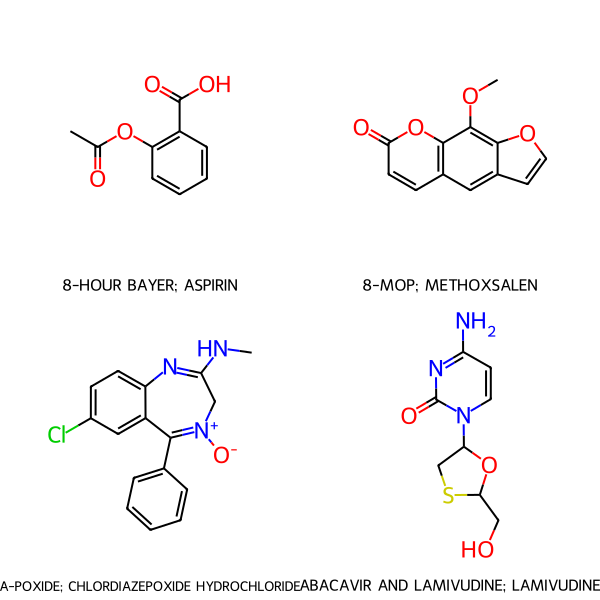

In [ ]:
Draw.MolsToGridImage(
    mols2,
    molsPerRow=2,
    maxMols=4,
    subImgSize=(300, 300),
    legends=[x.GetProp("FDA drugnames") for x in mols2]
    )